In [23]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import IntervalKMeans
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          3.633771        91.572487         6.104954        81.814715   
1         72.900683        80.625858         1.688880        30.409895   
2          9.183552        57.623434        31.879140        75.938023   
3         46.926352        91.413752        40.532756        85.394983   
4         11.670118        28.733445        12.352786        46.028336   
5         64.014921        98.378123         2.831427        32.270974   
6         16.958815        53.541095         2.833982        90.964093   
7         13.419557        39.170968        72.733541        72.976214   
8         30.352364        91.414554         1.271566        78.274525   
9         54.905364        56.141384        61.055842        73.428635   
10        44.876372        87.670980        52.724376        98.806

In [24]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  

<class 'interClusLib.data_structure.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)


In [25]:
distance_matrix = IntervalMetrics.pairwise_distance(random_data.get_intervals(),"hausdorff","mean")

print(distance_matrix)

[[ 0.         30.27512208 19.11320415 25.0958206  23.66442743 27.54388583
   8.76263187 25.41469061 11.03871203 18.7873471  22.64958168 15.59181424
  20.8608235  14.96476337 25.39279994 25.79170147 21.41210145 18.2177363
  29.48295241 24.7892117  33.67858745 18.07678235 17.77986145 23.79819439
  27.09171789 13.86031558 10.75554077 13.92470857 20.00132714 16.1658741 ]
 [30.27512208  0.         45.65947594 40.94008213 26.10794794 15.0967188
  34.19322388 48.12239906 21.53050334 33.8387683  36.0802994  26.25139313
  13.62354525 23.77897788 23.86188206 50.71298365 41.28621001 41.13481096
  39.47427785  9.88241666 60.19562159 35.15344979 41.13391121 43.55813908
  27.69674652 25.82985548 30.79678949 29.47896015 44.81225198 40.39575486]
 [19.11320415 45.65947594  0.         17.32699657 29.44052674 38.01768289
  14.65098688 17.1579906  26.38605807 21.37505189 25.9737583  20.8638466
  34.5935521  21.88049805 24.37856063 15.17573718 22.86553615 13.19075573
  25.47033224 38.08542603 17.17285716 2

In [26]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean") 

print(model.labels_)

[3 0 3 2 0 0 3 1 0 2 2 0 0 2 0 1 3 3 1 0 1 1 2 2 2 2 3 0 3 3]


In [27]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    ClusteringVisualization.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    ClusteringVisualization.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    ClusteringVisualization.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


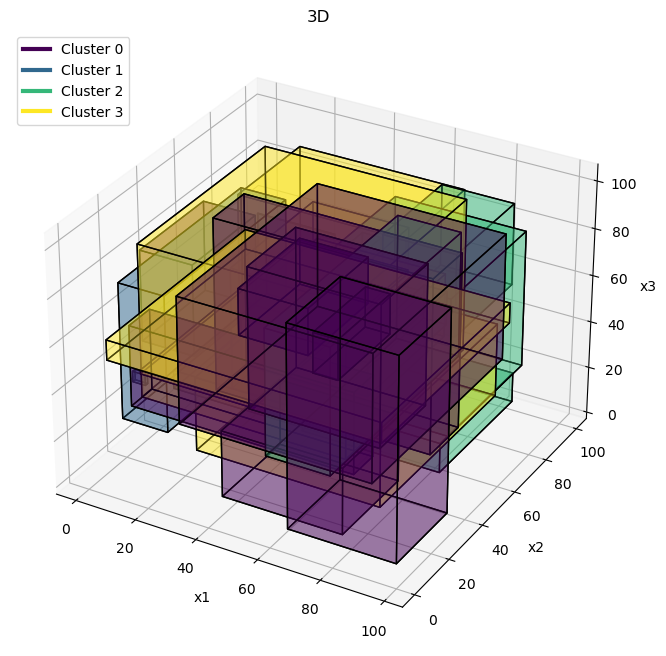

In [28]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper
0         26.114243        68.432766
1         23.902086        35.961384
2         24.520962        28.111302
3         51.030133        68.901640
4          7.035696        90.058147
5         78.237968        97.971880
6         71.798366        94.337559
7         41.506869        76.969205
8         37.190980        79.509642
9         65.905889        88.793665
10        69.471564        86.941486
11         1.552310        44.135877
12        87.465777        94.625802
13        13.870617        88.590173
14        32.195456        51.144894
15        44.715015        45.838432
16         9.829989        55.564584
17         8.270605        25.906336
18        88.799450        89.892555
19        30.792372        62.793747
20         5.974397        27.471871
21        44.571672        83.655372
22        61.535620        95.112907
23        57.373449        66.226712
24        59.143650        81.202557
25         9.6

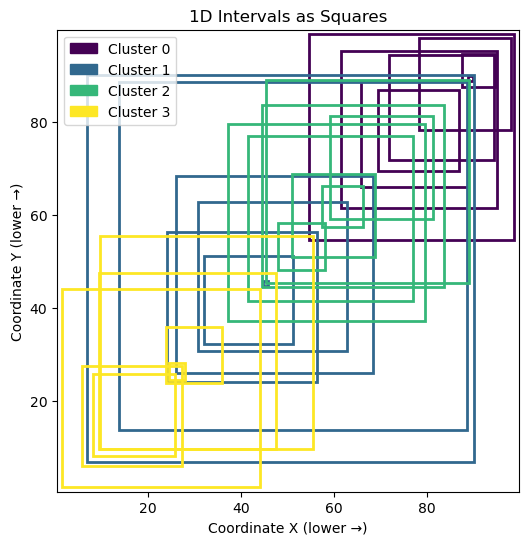

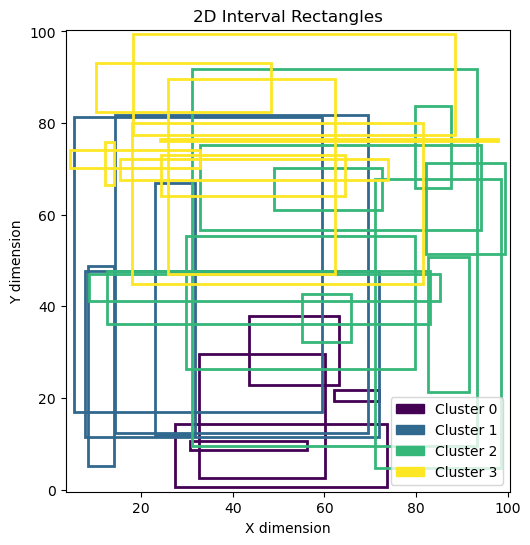

In [29]:
random_data = IntervalData.random_data(30, 1)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)

random_data = IntervalData.random_data(30, 2)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_2d_intervals(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper
0         61.865176        70.464599        39.971581        78.164906
1         51.499331        95.282147        77.030690        92.185771
2         25.367897        53.013759        60.434408        73.696173
3         56.167704        77.385851        25.186392        50.067260
4         13.053677        31.148356        43.468698        77.696106
5         40.186311        82.729774        78.866756        85.245025
6          6.304995        98.337505        43.778683        74.910942
7         12.699616        35.869571         3.387324        80.016760
8         21.452663        79.014023        14.884810        57.592125
9         13.259615        84.698420        13.335254        82.623967
10        37.350109        74.686628        37.353495        93.882460
11         4.690477        20.804221        28.920428        44.750270
12         9.366462        91.698724        13.124947

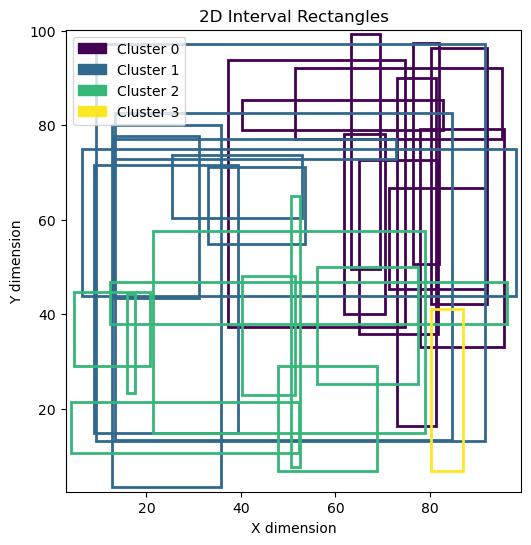

In [30]:
random_data = IntervalData.random_data(30, 2)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_2d_intervals(random_data.get_intervals(), model.labels_)